In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22701


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22696,2021-05-08,47,沖縄県,93,12992,0,138
22697,2021-05-09,47,沖縄県,103,13095,0,138
22698,2021-05-10,47,沖縄県,36,13131,1,139
22699,2021-05-11,47,沖縄県,132,13263,0,139
22700,2021-05-12,47,沖縄県,109,13372,1,140


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10626,7046,130
43,香川県,17871,1684,23
44,高知県,18837,1132,20
45,鳥取県,14973,406,2
46,鹿児島県,22218,2710,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22694,2021-05-06,47,沖縄県,39,12817,0,137,413.0
22695,2021-05-07,47,沖縄県,82,12899,1,138,436.0
22696,2021-05-08,47,沖縄県,93,12992,0,138,424.0
22697,2021-05-09,47,沖縄県,103,13095,0,138,470.0
22698,2021-05-10,47,沖縄県,36,13131,1,139,449.0
22699,2021-05-11,47,沖縄県,132,13263,0,139,548.0
22700,2021-05-12,47,沖縄県,109,13372,1,140,594.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
482,北海道,2836.0
965,青森県,210.0
1448,岩手県,127.0
1931,宮城県,248.0
2414,秋田県,107.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11592,4265,95,307.0
1,京都府,12558,14076,195,914.0
2,佐賀県,19803,2091,15,352.0
3,兵庫県,13524,36313,818,2738.0
4,北海道,483,28040,913,2836.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11592,4265,95,307.0,1813859
1,京都府,12558,14076,195,914.0,2545899
2,佐賀県,19803,2091,15,352.0,823810
3,兵庫県,13524,36313,818,2738.0,5549568
4,北海道,483,28040,913,2836.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,483,28040,913,2836.0,5267762,53.229436,532.294360,53.836905
41,青森県,966,1873,27,210.0,1275783,14.681180,146.811801,16.460480
19,岩手県,1449,1138,38,127.0,1235517,9.210719,92.107191,10.279098
11,宮城県,1932,8439,74,248.0,2292385,36.813188,368.131880,10.818427
36,秋田県,2415,643,9,107.0,985416,6.525163,65.251630,10.858358
15,山形県,2898,1638,37,67.0,1082296,15.134492,151.344919,6.190543
35,福島県,3381,4061,129,453.0,1881981,21.578326,215.783262,24.070381
38,茨城県,3864,8749,135,365.0,2921436,29.947601,299.476011,12.493856
27,栃木県,4347,5682,74,214.0,1965516,28.908439,289.084393,10.887726
37,群馬県,4830,6946,110,594.0,1969439,35.268927,352.689268,30.160873


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13978.255319
std       26769.954932
min         394.000000
25%        1982.000000
50%        4192.000000
75%        8594.000000
max      149061.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6279,149061,1931,6118.0,13834925,107.742543,1077.425429,44.221418
1,大阪府,13041,92035,1835,6138.0,8849635,103.998639,1039.986395,69.358793
2,神奈川県,6762,56571,847,1928.0,9209442,61.427174,614.271744,20.935036
3,埼玉県,5313,40545,756,1673.0,7390054,54.864281,548.642811,22.638536
4,愛知県,11109,38433,660,3462.0,7575530,50.733084,507.330840,45.699773
5,兵庫県,13524,36313,818,2738.0,5549568,65.433922,654.339221,49.337174
6,千葉県,5796,34857,648,995.0,6319772,55.155471,551.554708,15.744239
7,福岡県,19320,28243,376,3189.0,5129841,55.056287,550.562873,62.165669
8,北海道,483,28040,913,2836.0,5267762,53.229436,532.294360,53.836905
9,京都府,12558,14076,195,914.0,2545899,55.288918,552.889176,35.900874


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      32.555886
std       23.919148
min        5.799883
25%       16.563014
50%       25.297142
75%       43.773136
max      107.742543
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
9,大阪府,13041,92035,1835,6138.0,8849635,103.998639,1039.986395,69.358793
34,福岡県,19320,28243,376,3189.0,5129841,55.056287,550.562873,62.165669
18,岡山県,15939,5443,64,1039.0,1903627,28.592786,285.927863,54.580020
4,北海道,483,28040,913,2836.0,5267762,53.229436,532.294360,53.836905
3,兵庫県,13524,36313,818,2738.0,5549568,65.433922,654.339221,49.337174
24,愛知県,11109,38433,660,3462.0,7575530,50.733084,507.330840,45.699773
26,東京都,6279,149061,1931,6118.0,13834925,107.742543,1077.425429,44.221418
2,佐賀県,19803,2091,15,352.0,823810,25.382066,253.820663,42.728299
8,大分県,21252,2590,30,491.0,1151229,22.497696,224.976959,42.650072
10,奈良県,14007,7020,92,552.0,1353837,51.852623,518.526233,40.773003


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


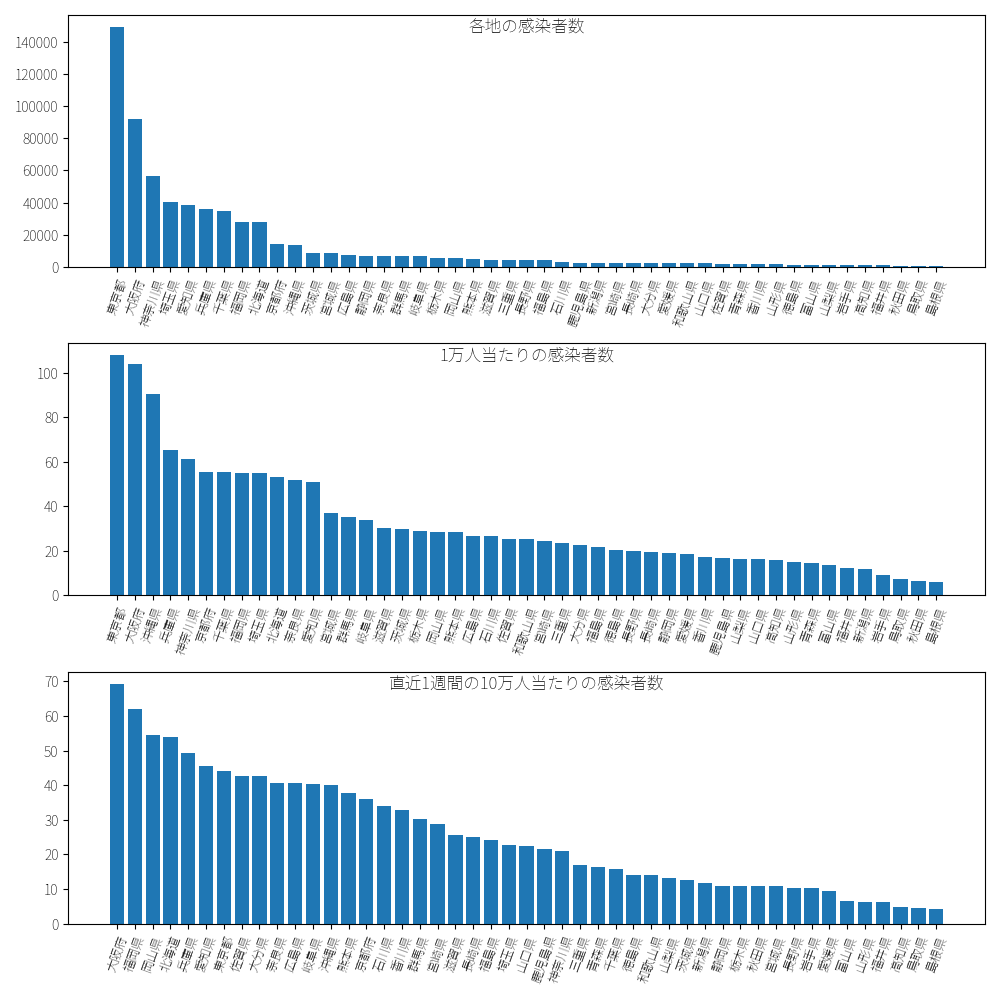

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   394.     18977.375  37560.75   56144.125  74727.5    93310.875
 111894.25  130477.625 149061.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


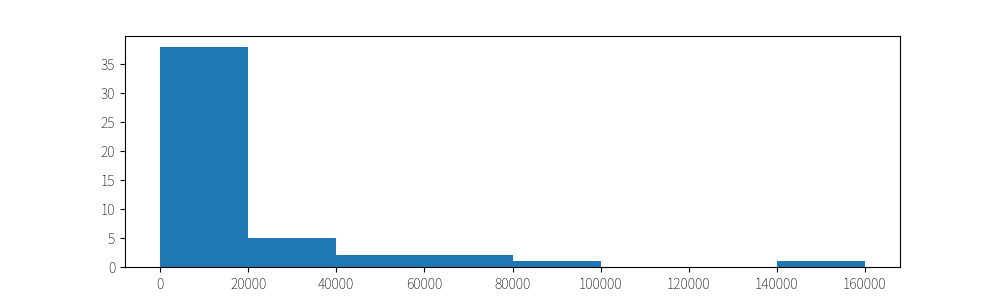

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [18]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


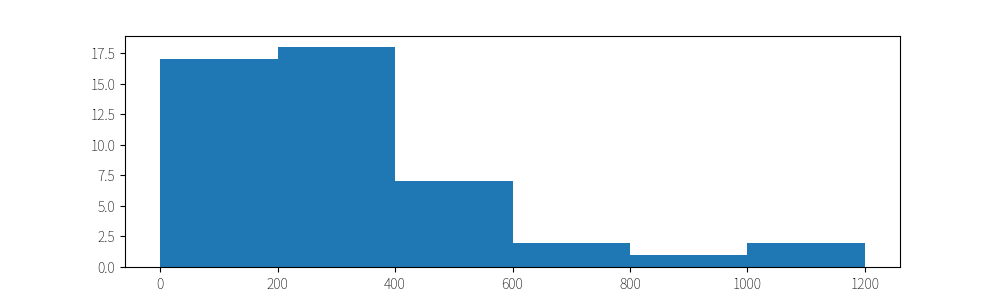

(array([17., 18.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
